In [1]:
import tarfile
import os

data_base_path = os.path.join('data')
data_folder = 'lab-02-data'
data_part1 = os.path.join(data_base_path, data_folder, 'part1')
data_part2 = os.path.join(data_base_path, data_folder, 'part2')

tar_path = os.path.join(data_base_path, data_folder + '.tar.gz')
with tarfile.open(tar_path, mode='r:gz') as tar:
    tar.extractall(path=data_base_path)

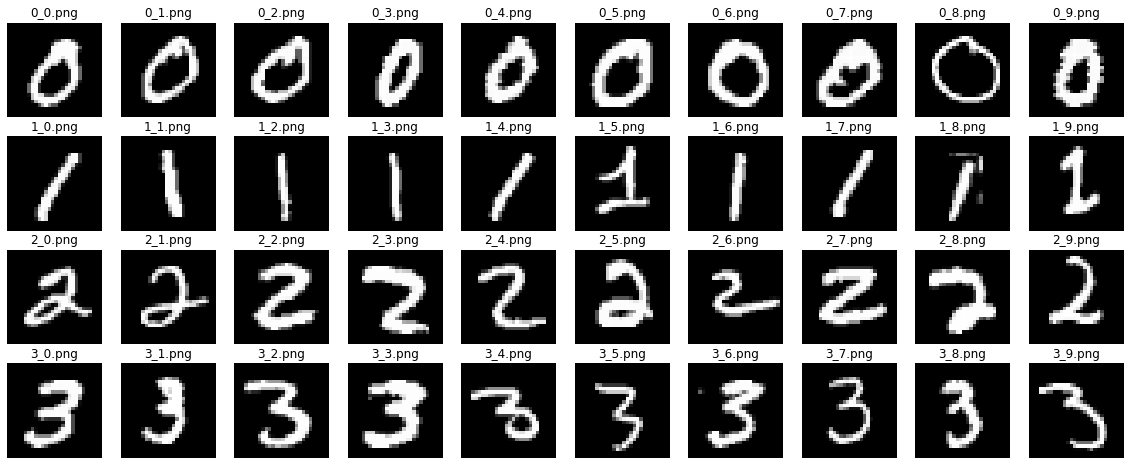

In [2]:
import skimage.io
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

def load(path, digit='0'):
    digit_path = os.path.join(path, digit)
    digit_names = [nm for nm in os.listdir(digit_path) if '.png' in nm]  # make sure to only load .png
    digit_names.sort()  # sort file names
    ic = skimage.io.imread_collection([os.path.join(digit_path, nm) for nm in digit_names])
    digit_im = skimage.io.concatenate_images(ic)
    return digit_im, digit_names
                        
# Load digits data

# Zero images arrays
zeros_im, zeros_names = load(data_part1, digit='0')
# Ones images arrays
ones_im, ones_names = load(data_part1, digit='1')
# Twos images arrays
twos_im, twos_names = load(data_part2, digit='2')
# Threes images arrays
threes_im, threes_names = load(data_part2, digit='3')

# Plot images
fig, axes = plt.subplots(4, len(zeros_im), figsize=(20, 8))
for ax, im, nm in zip(axes[0], zeros_im, zeros_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[1], ones_im, ones_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[2], twos_im, twos_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)
for ax, im, nm in zip(axes[3], threes_im, threes_names):
    ax.imshow(im, cmap='gray')
    ax.axis('off')
    ax.set_title(nm)

## 1.1. Preprocess and visualization (2 pts)

TypeError: title() missing 1 required positional argument: 'label'

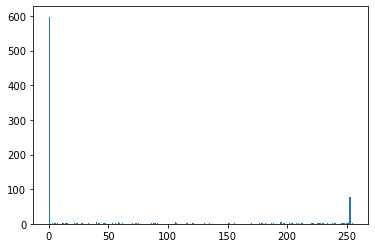

In [9]:
plt.hist(zeros_im[0].flatten(),bins=256)
plt.title("histogram")
plt.show()


In [3]:
import cv2
from cv2 import findContours
output = cv2.findContours(zeros_im[0],mode=1,method= cv2.CHAIN_APPROX_NONE)
output[0]
#plt.imshow(output[0])
#plt.show()

(array([[[15, 12]],
 
        [[16, 11]],
 
        [[17, 12]],
 
        [[18, 13]],
 
        [[18, 14]],
 
        [[18, 15]],
 
        [[18, 16]],
 
        [[18, 17]],
 
        [[17, 18]],
 
        [[16, 19]],
 
        [[15, 20]],
 
        [[14, 20]],
 
        [[13, 21]],
 
        [[12, 21]],
 
        [[11, 21]],
 
        [[10, 21]],
 
        [[ 9, 20]],
 
        [[ 9, 19]],
 
        [[ 9, 18]],
 
        [[ 9, 17]],
 
        [[10, 16]],
 
        [[11, 15]],
 
        [[12, 14]],
 
        [[13, 13]],
 
        [[14, 12]]], dtype=int32),
 array([[[14,  5]],
 
        [[13,  6]],
 
        [[13,  7]],
 
        [[12,  8]],
 
        [[12,  9]],
 
        [[11, 10]],
 
        [[11, 11]],
 
        [[10, 12]],
 
        [[ 9, 12]],
 
        [[ 9, 13]],
 
        [[ 8, 14]],
 
        [[ 7, 15]],
 
        [[ 7, 16]],
 
        [[ 6, 17]],
 
        [[ 6, 18]],
 
        [[ 6, 19]],
 
        [[ 6, 20]],
 
        [[ 6, 21]],
 
        [[ 7, 22]],
 
        [[ 7, 23]],

In [41]:
contour_in = [list(x[0]) for x in output[0][1]]
contour_out = [list(x[0]) for x in output[0][0]]
contour_image = np.zeros_like(zeros_im[0])
for i,j in contour_in:
    contour_image[i][j]=1
for i,j in contour_out:
    contour_image[i][j]=1

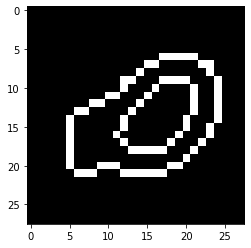

In [5]:
plt.imshow(contour_image,cmap='gray')

## Fourier tricks

In [42]:
import numpy as np
from numpy import fft
complex_contour_in = list(map(lambda x: x[0]+x[1]*1j,contour_in))
complex_contour_out = list(map(lambda x: x[0]+x[1]*1j,contour_out))
contour_in_fft = fft.fft(complex_contour_in)
contour_out_fft = fft.fft(complex_contour_out)
contour_in_fft

array([ 7.36000000e+02+7.59000000e+02j,  9.01393674e+01-3.58419001e+01j,
        1.36478472e+01-1.49077204e+01j,  2.17121540e+00+1.73137737e+00j,
       -8.59839623e+00+3.04809251e+00j, -7.57516493e+00-6.43095988e+00j,
       -8.17808157e-01-4.20823284e+00j, -5.09206035e-01-3.34615711e+00j,
       -6.38527991e-02+1.79315107e+00j, -9.42597200e-01+1.88806450e+00j,
       -1.83306549e-01-1.30517310e+00j,  9.72259187e-01-2.10463295e+00j,
        1.24162455e+00-1.39368158e+00j, -1.00000000e+00-1.31838984e-15j,
       -3.18373660e+00+6.22221280e-01j,  6.65649914e-01-1.16204339e-01j,
       -1.42154946e+00+1.94776111e+00j,  2.74917385e+00+2.53030133e-01j,
        1.24776748e+00-2.60474184e+00j, -2.31756623e+00-1.48496669e+00j,
       -7.06288571e-01+1.05368302e+00j, -8.05186463e-01+5.72371191e-01j,
       -1.45345345e+00+2.60021440e+00j,  3.61129339e+00-1.02327838e+00j,
        2.62608691e-01+1.98082030e+00j,  6.65427941e-01+1.18955467e+00j,
        2.00000000e+00-1.00000000e+00j, -9.64475200

In [43]:
z = np.array([1+1j,1,2])
#np.copy(z)
z[:0] = 0
z
#contour_out_fft

array([1.+1.j, 1.+0.j, 2.+0.j])

In [44]:
import cv2
import numpy as np
from numpy import fft
def fourier_function(contour_in_fftt,contour_out_fftt,num_zeros):
    fig, axs = plt.subplots(ncols=num_zeros,figsize=(5*num_zeros,5))
    for k in range(num_zeros):
        ct_in_trim = np.copy(contour_in_fftt)
        ct_out_trim = np.copy(contour_out_fftt)
        ct_in_trim[:k] = 0 + 0*1j
        ct_out_trim[:k] = 0 + 0*1j
        ct_in = fft.ifft(ct_in_trim)
        ct_out = fft.ifft(ct_out_trim)
        ct_image = np.zeros_like(zeros_im[0])
        for i,j in np.column_stack((ct_in.real,ct_in.imag)):
            ct_image[round(i),round(j)]=1
        for i,j in np.column_stack((ct_out.real,ct_out.imag)):
            ct_image[round(i),round(j)]=1
        axs[k].imshow(ct_image)
        axs[k].set_title(f"{k}")
    fig.show()
    return 0

#fourier_function(contour_in_fft,contour_out_fft,10)
    



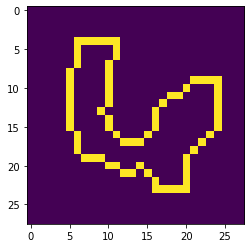

<ipython-input-44-1ad88587424d>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


0

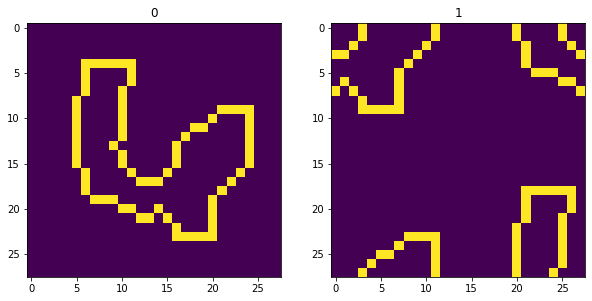

In [128]:
output = cv2.findContours(twos_im[8],mode=1,method= cv2.CHAIN_APPROX_NONE)
#output[1]
contour_in = [list(x[0]) for x in output[0][-1]]
contour_out = [list(x[0]) for x in output[0][0]]
contour_image = np.zeros_like(ones_im[0])
for i,j in contour_in:
    contour_image[i][j]=1
for i,j in contour_out:
    contour_image[i][j]=1
plt.imshow(contour_image)
plt.show()
complex_contour_in = list(map(lambda x: x[0]+x[1]*1j,contour_in))
complex_contour_out = list(map(lambda x: x[0]+x[1]*1j,contour_out))
contour_in_fft1 = fft.fft(complex_contour_in)
contour_out_fft1 = fft.fft(complex_contour_out)
fourier_function(contour_in_fft1,contour_out_fft1,2)

In [49]:
from sklearn.decomposition import PCA
k = 10
pca = PCA(n_components = k)
contour_in_fft1

array([ 6.52000000e+02+6.67000000e+02j,  1.49083092e+02-1.09129701e+02j,
        7.49650021e+00+4.26817678e+00j,  3.03379895e+00+4.72689906e+00j,
       -2.16015954e+00-2.86634702e+00j, -3.55046659e+00-1.37731448e-01j,
       -1.38934271e+00-9.07851872e-01j,  3.39083841e+00-3.38383701e+00j,
       -1.84535461e+00+1.58307785e+00j,  4.18872258e-01+9.01398919e-01j,
       -3.63774908e+00+3.03729036e+00j, -9.91761260e-01-5.29537716e+00j,
       -3.25273354e+00+1.49233083e+00j,  6.84953315e-01-4.01112376e+00j,
       -1.02755267e+00-3.41697749e-01j, -1.16546787e-01+1.72466367e+00j,
        2.47878505e+00+3.18979332e+00j, -7.60799703e-02+1.29903182e-01j,
        1.64677891e+00-2.23465030e+00j,  5.86584833e-01+7.98457210e-01j,
       -5.46096689e-01+6.64391936e-01j,  4.51330857e-01-1.13259133e+00j,
        1.44631575e+00-6.46886479e-01j,  4.99600361e-15+1.00000000e+00j,
       -5.96084349e-02+2.24946311e-01j,  4.26242344e-02+1.80468074e+00j,
       -2.69270943e+00-2.96285295e+00j,  1.63948891

In [70]:
output = cv2.findContours(threes_im[0],mode=1,method= cv2.CHAIN_APPROX_NONE)
contour_in = [list(x[0]) for x in output[0][1]]
contour_out = [list(x[0]) for x in output[0][0]]
contour_image = np.zeros_like(zeros_im[0])
for i,j in contour_in:
    contour_image[i][j]=1
for i,j in contour_out:
    contour_image[i][j]=1
complex_contour_in = list(map(lambda x: x[0]+x[1]*1j,contour_in))
complex_contour_out = list(map(lambda x: x[0]+x[1]*1j,contour_out))
contour_in_fft = fft.fft(complex_contour_in)
contour_out_fft = fft.fft(complex_contour_out)
fourier_function(contour_in_fft,contour_out_fft,10)


IndexError: tuple index out of range

# Task 2

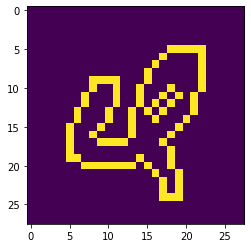

87


In [8]:
img = twos_im[0]
contours = cv2.findContours(img,mode=1,method=cv2.CHAIN_APPROX_NONE)
contour_img = np.zeros_like(img)
for contour in contours[0]:
    contour = [list(x[0]) for x in contour]
    for i,j in contour:
        contour_img[i][j]=1
plt.imshow(contour_img)
#plt.imshow(img)
plt.show()
print(sum([len(contour) for contour in contours[0]]))


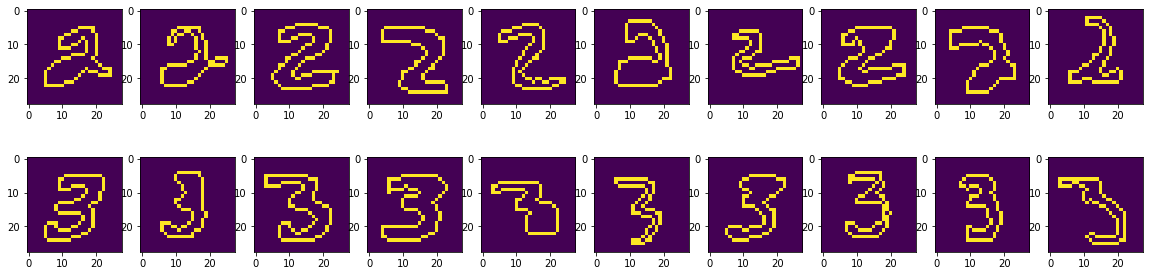

In [25]:
fig, axs = plt.subplots(ncols=10,nrows=2,figsize=(20,5))
for k in range(10):
    img2 = twos_im[k]
    img3 = threes_im[k]
    contours = cv2.findContours(img2,mode=1,method=cv2.CHAIN_APPROX_NONE)
    contour_img = np.zeros_like(img2)
    max_len = 0
    for contour in contours[0]:
        if len(contour)>max_len:
            max_len = len(contour)
            long_contour = [list(x[0]) for x in contour]
    for i,j in long_contour:
        contour_img[j][i]=1
    axs[0][k].imshow(contour_img)
    contours = cv2.findContours(img3,mode=1,method=cv2.CHAIN_APPROX_NONE)
    contour_img = np.zeros_like(img3)
    max_len = 0
    for contour in contours[0]:
        if len(contour)>max_len:
            max_len = len(contour)
            long_contour = [list(x[0]) for x in contour]
    for i,j in long_contour:
        contour_img[j][i]=1
    axs[1][k].imshow(contour_img)

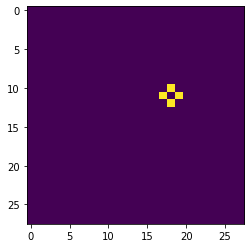

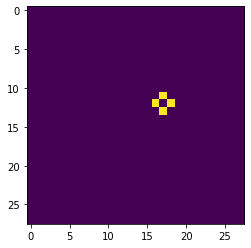

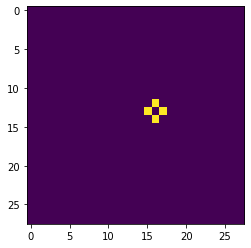

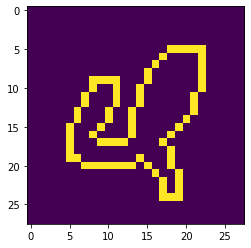

In [17]:
def perimeter_area(img):
    contours = cv2.findContours(img,mode=1,method=cv2.CHAIN_APPROX_NONE)
    contour_img = np.zeros_like(img)
    max_len = 0
    for contour in contours[0]:
        contour = [list(x[0]) for x in contour]
        if len(contour)>max_len:
            max_len = len(contour)
            long_contour = np.array(contour)
        for i,j in contour:
            contour_img[i][j]=1
    perimeter = 0
    for x in (long_contour[1:]-long_contour[:-1]):
        perimeter += np.linalg.norm(x)
    #perimeter = max([len(contour) for contour in contours[0]])
    area = np.sum(img>200)
    return [perimeter, area]

#perimeter_area(img)
contours = cv2.findContours(img,mode=1,method=cv2.CHAIN_APPROX_NONE)
for contour in contours[0]:
    contour_img = np.zeros_like(img)
    plt.figure()
    contour = [list(x[0]) for x in contour]
    for i,j in contour:
        contour_img[i][j]=1
    plt.imshow(contour_img)
    plt.show()
#contours[0]

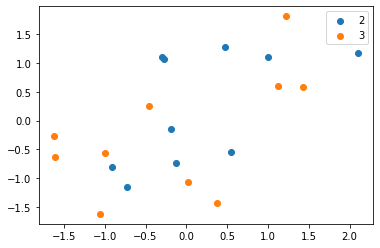

In [23]:
def perimeter_area(img):
    contours = cv2.findContours(img,mode=1,method=cv2.CHAIN_APPROX_NONE)
    contour_img = np.zeros_like(img)
    max_len = 0
    for contour in contours[0]:
        contour = [list(x[0]) for x in contour]
        if len(contour)>max_len:
            max_len = len(contour)
            long_contour = np.array(contour)
        for i,j in contour:
            contour_img[i][j]=1
    perimeter = 0
    for x in (long_contour[1:]-long_contour[:-1]):
        perimeter += np.linalg.norm(x)
    area = np.sum(img/255)
    return [perimeter, area]

features_2 = []
features_3 = []
for i in range(10):
    img_2 = twos_im[i]
    img_3 = threes_im[i]
    features_2.append(perimeter_area(img_2))
    features_3.append(perimeter_area(img_3))
features_2 = np.array(features_2)
features_3 = np.array(features_3)

from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()
scaler.fit(np.vstack([features_2,features_3]))
features_2 = scaler.transform(features_2)
features_3 = scaler.transform(features_3)

plt.scatter(features_2[:,0],features_2[:,1],label='2')
plt.scatter(features_3[:,0],features_3[:,1],label='3')
plt.legend()

In [157]:
np.vstack([features_2,features_3])

array([[ 75.        , 116.08235294],
       [ 76.        ,  96.60784314],
       [ 94.        , 159.9254902 ],
       [ 83.        , 163.40392157],
       [ 80.        , 103.07058824],
       [ 76.        , 157.58039216],
       [ 72.        ,  82.78431373],
       [ 86.        , 157.20392157],
       [ 75.        , 156.09803922],
       [ 69.        ,  94.59215686],
       [ 88.        , 140.65490196],
       [ 63.        , 111.95294118],
       [ 90.        , 140.23921569],
       [ 88.        , 180.83137255],
       [ 66.        , 100.00784314],
       [ 68.        ,  67.42745098],
       [ 72.        , 129.2627451 ],
       [ 80.        ,  73.53333333],
       [ 69.        , 102.5372549 ],
       [ 77.        ,  85.61568627]])

In [152]:
np.std(features_3[:,0])


9.481033698917013